## Bài tập 1

Text(0.5, 1.0, 'Remove gaussian noise with kernel 7x7')

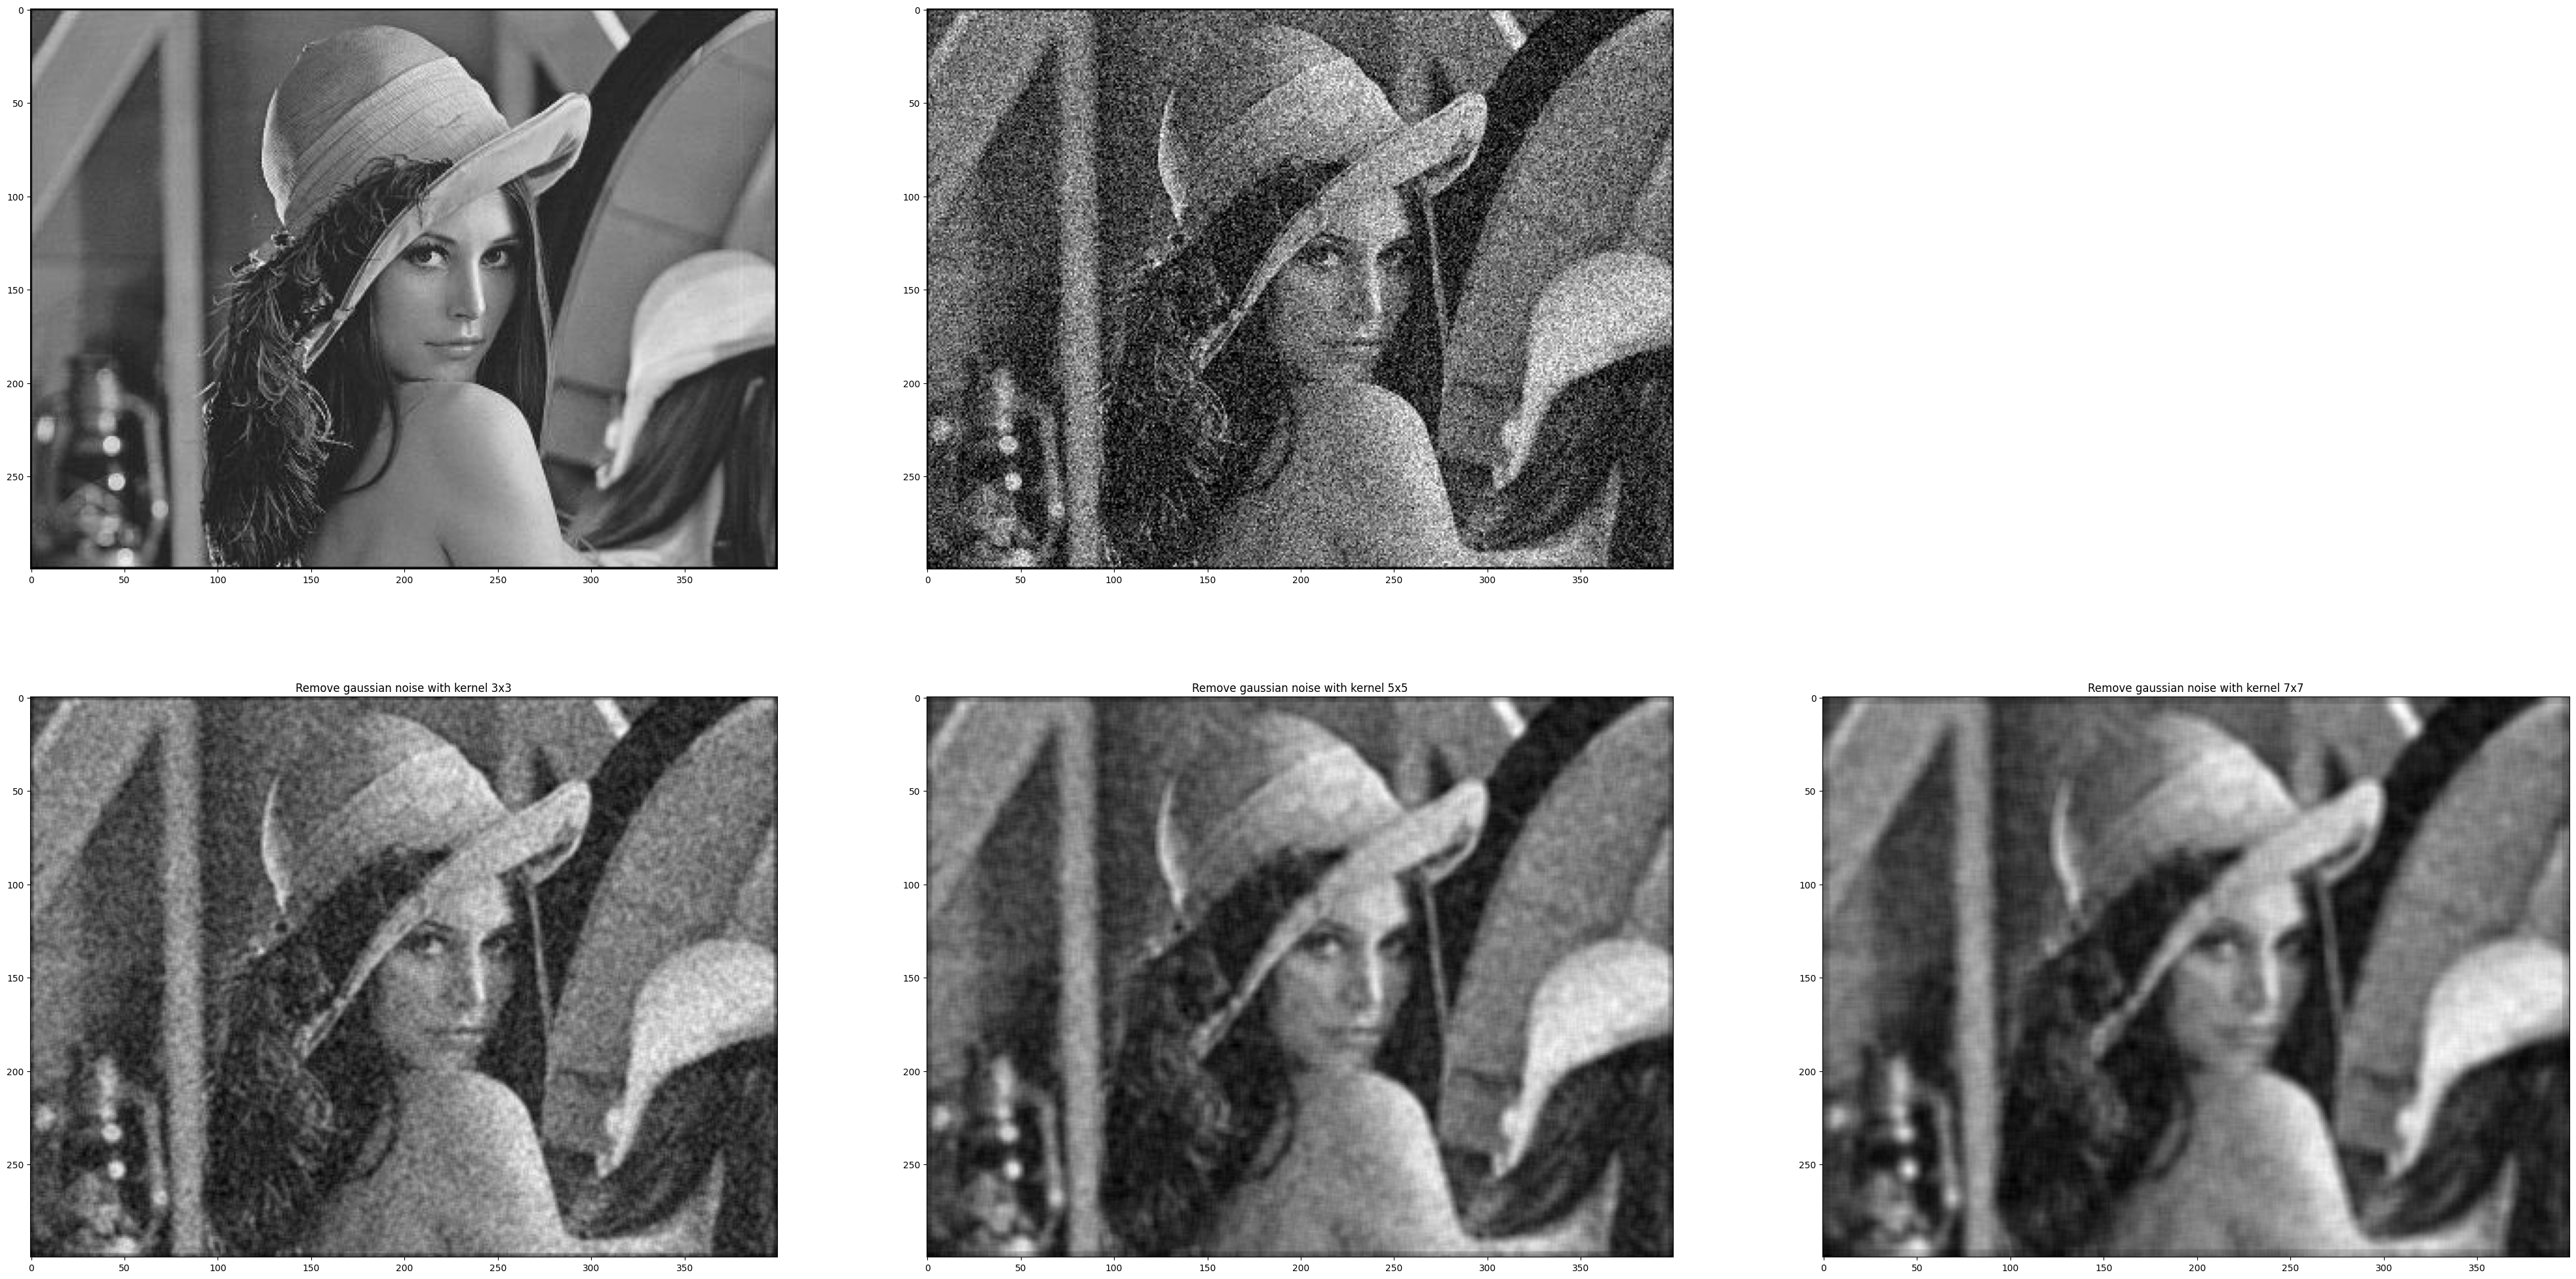

In [112]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.util import random_noise
from scipy.ndimage import gaussian_filter

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return np.round(gray) .astype(np.uint8)

def mean_filter(data, kernel_size):
    temp = []
    kernel_halfsize = kernel_size // 2
    data_final = np.zeros((len(data), len(data[0])))

    for i in range(len(data)):  # Height
        for j in range(len(data[0])):  # Width
            sum_values = 0
            count = 0

            for z in range(kernel_size):
                for k in range(kernel_size):
                    if (i + z - kernel_halfsize >= 0 and i + z - kernel_halfsize < len(data) and
                        j + k - kernel_halfsize >= 0 and j + k - kernel_halfsize < len(data[0])):
                        sum_values += data[i + z - kernel_halfsize][j + k - kernel_halfsize]
                        count += 1

            # Calculate mean and assign to the corresponding position in data_final
            data_final[i][j] = sum_values / count

    return data_final

# Convert rgb to gray
lena_img = Image.open('D:/opencvApp/th-xla/data/lena.jpg')
lena_gray_img = rgb2gray(np.array(lena_img))

# Add gaussian noise
lena_gray_img = np.array(lena_gray_img)
lena_gauss_noise_img = random_noise(lena_gray_img, mode='gaussian', mean=0, var=0.02)

#Remove gaussian noise
lena_remove_gaussian_img_ker3 = mean_filter(lena_gauss_noise_img, 3)
lena_remove_gaussian_img_ker5 = mean_filter(lena_gauss_noise_img, 5)
lena_remove_gaussian_img_ker7 = mean_filter(lena_gauss_noise_img, 7)

plt.figure(figsize=(50,50))
plt.subplot(231)
plt.imshow(lena_gray_img, cmap='gray')
plt.subplot(232)
plt.imshow(lena_gauss_noise_img, cmap='gray')
plt.subplot(131)
plt.imshow(lena_remove_gaussian_img_ker3, cmap='gray')
plt.title("Remove gaussian noise with kernel 3x3")
plt.subplot(132)
plt.imshow(lena_remove_gaussian_img_ker5, cmap='gray')
plt.title("Remove gaussian noise with kernel 5x5")
plt.subplot(133)
plt.imshow(lena_remove_gaussian_img_ker7, cmap='gray')
plt.title("Remove gaussian noise with kernel 7x7")

### Bài tập 2

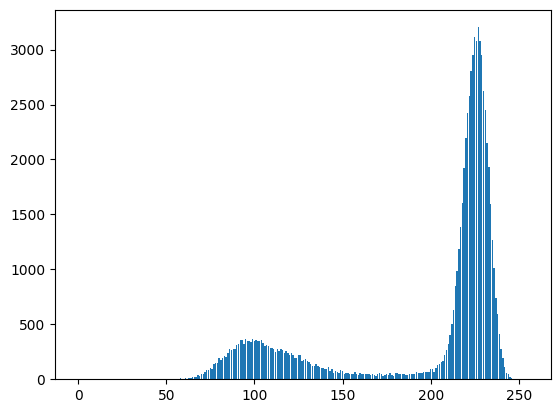

Text(0.5, 1.0, 'Binary Image (Segmented)')

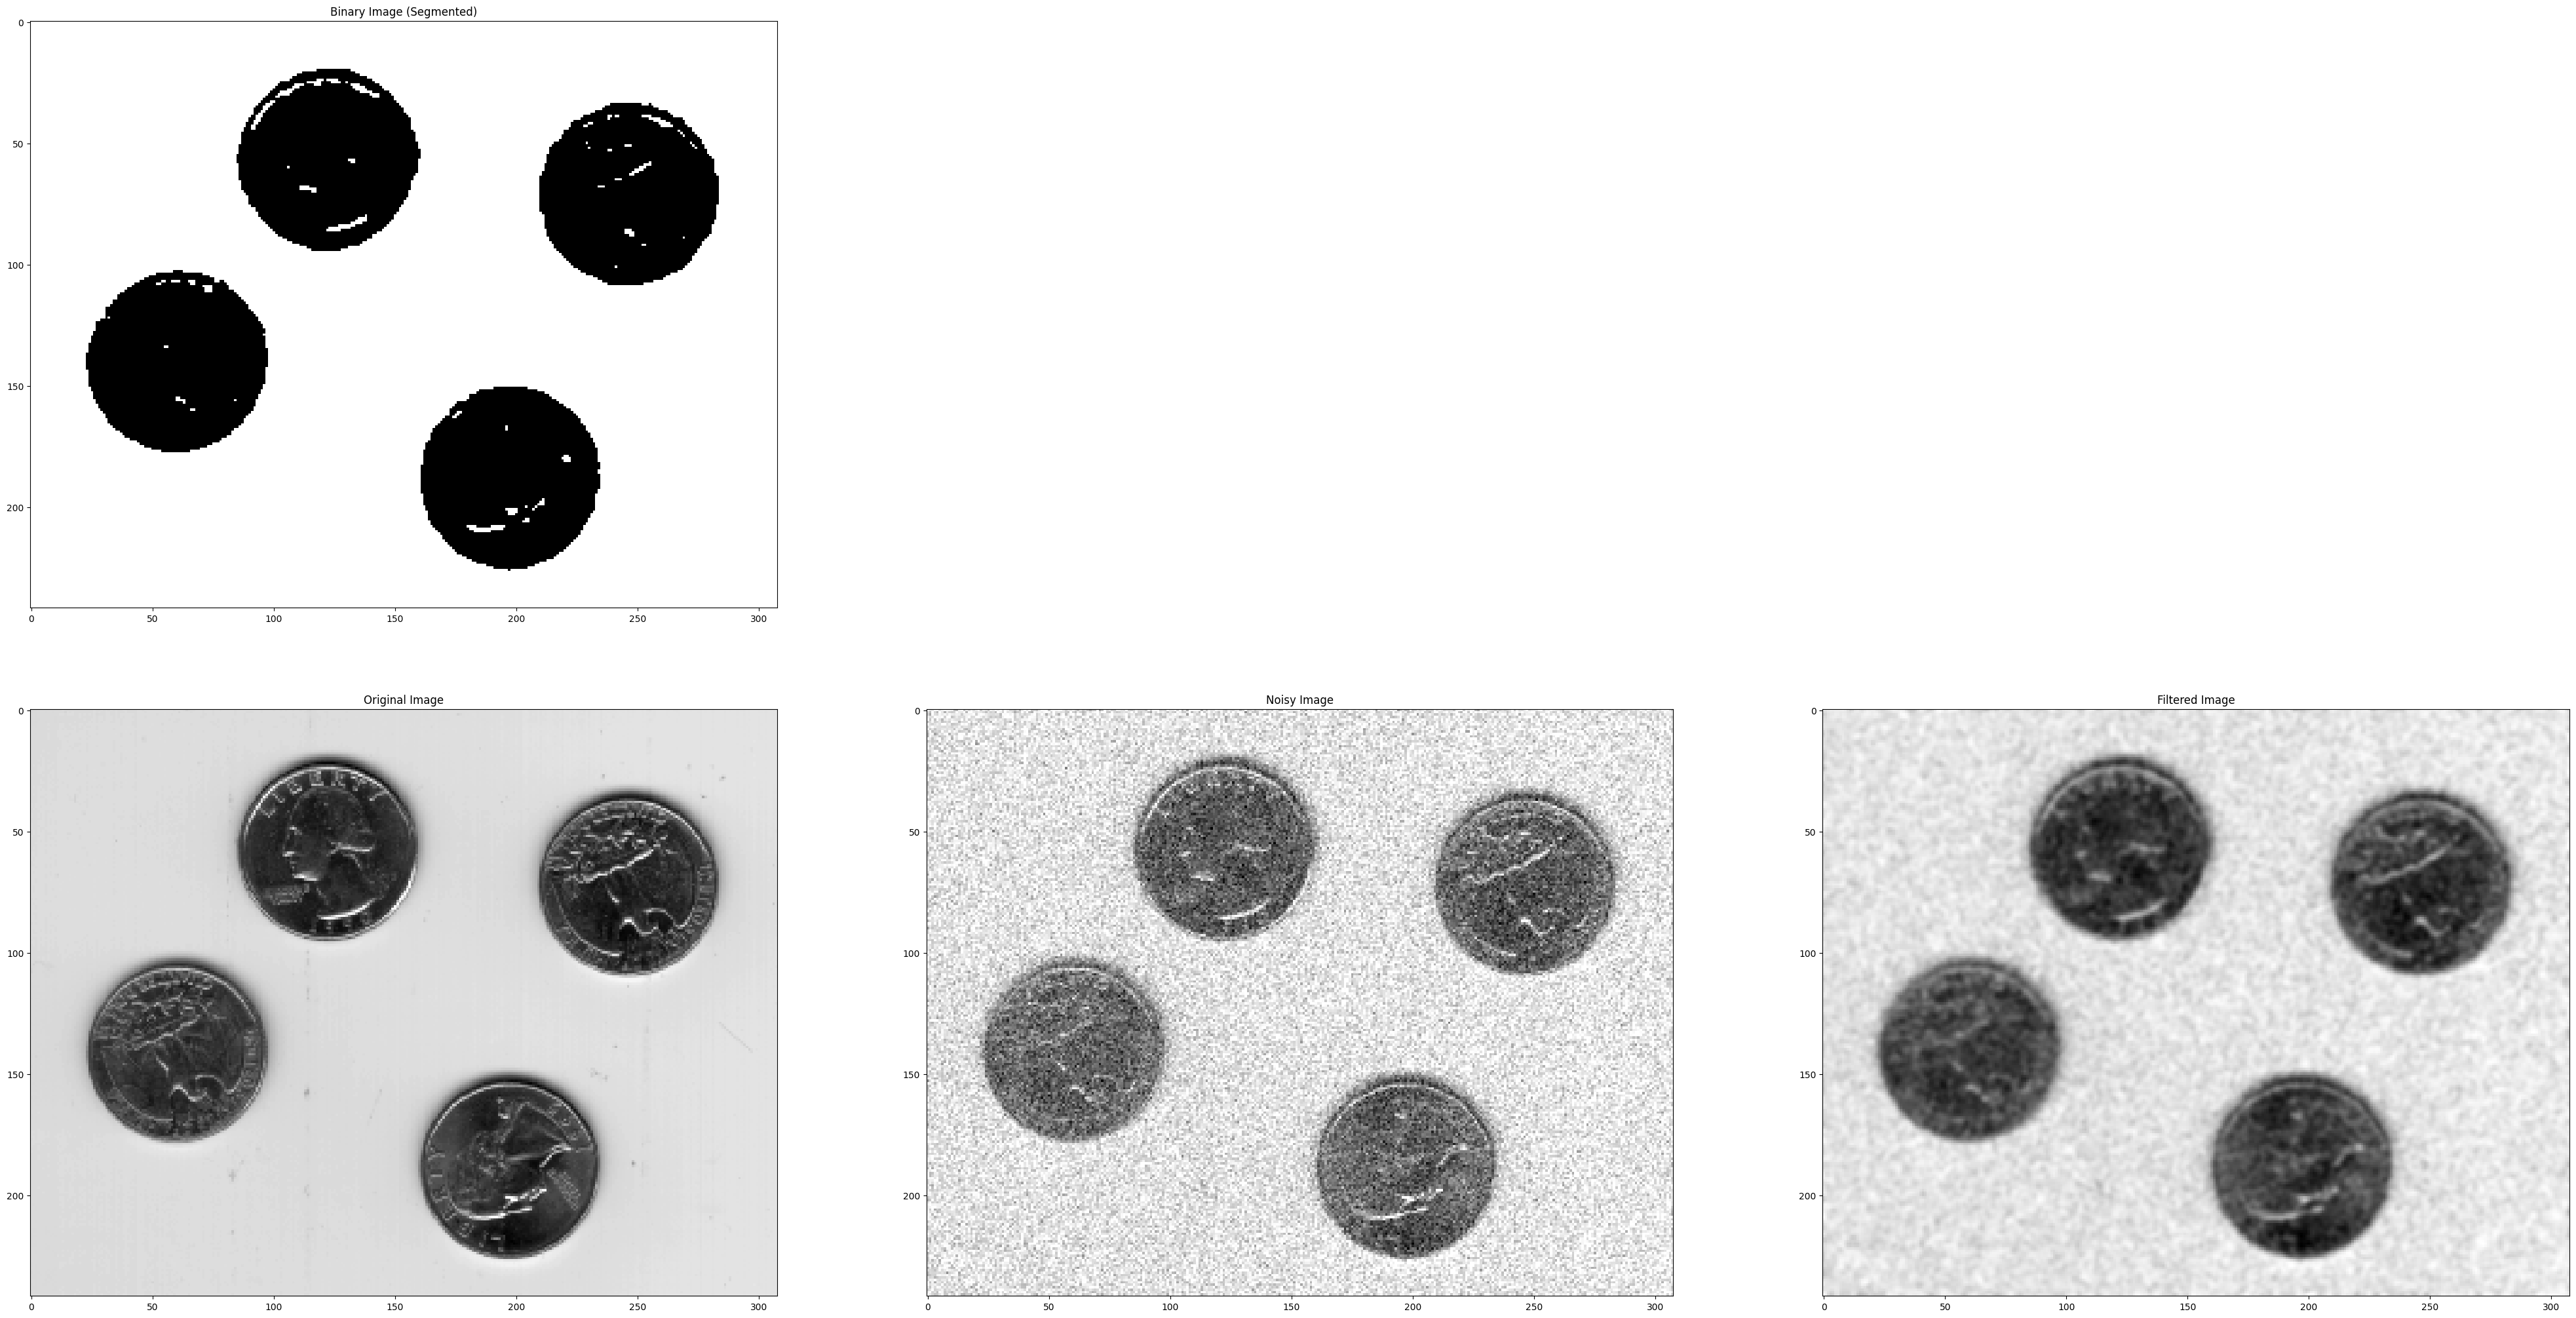

In [114]:

def histogram(img):
    #create list of values 0-255
    pixels=[]
    counts=[0]*256
    for x in range(256):
        pixels.append(x)

    for h in range(len(img)):
        for w in range(len(img[0])):
            counts[img[h, w]] +=1
    plt.figure()
    plt.bar(pixels,counts)
    plt.show()

coins_image = np.array(Image.open("data/coins.tif"))

# a: Thêm nhiễu gaussian
noisy_coins_image = random_noise(coins_image, mode='gaussian')

# b: Lọc gaussian để giảm nhiễu
filtered_coins_image = gaussian_filter(noisy_coins_image, sigma=1)

# Lưu lại ảnh đã lọc dưới dịnh dạng tif
filtered_image = Image.fromarray((filtered_coins_image * 255).astype(np.uint8))
filtered_image.save("data/filtered_coins_image.tif")

# Mở ảnh đã lọc
filtered_coins_image = np.array(Image.open("data/filtered_coins_image.tif"))

# c: Vẽ histogram
histogram(filtered_coins_image)
threshold = 150

# d: Sử dụng điểm ngưỡng để phân tách vật thể và nền
binary_image = filtered_coins_image > threshold

# Hiển thị ảnh gốc, ảnh có nhiễu, và ảnh đã được lọc
plt.figure(figsize=(50, 50))

plt.subplot(131)
plt.imshow(coins_image, cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(noisy_coins_image, cmap='gray')
plt.title('Noisy Image')

plt.subplot(133)
plt.imshow(filtered_coins_image, cmap='gray')
plt.title('Filtered Image')

# Hiển thị ảnh tách vật thể
plt.subplot(231)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image (Segmented)')